In [13]:
from AoE2ScenarioParser.datasets.players import PlayerId
from AoE2ScenarioParser.datasets.units import UnitInfo
from AoE2ScenarioParser.datasets.buildings import BuildingInfo
from AoE2ScenarioParser.datasets.other import OtherInfo
from AoE2ScenarioParser.datasets.terrains import TerrainId
from aoe2mapgenerator.common.enums.enum import (
    MapLayerType, 
    ObjectSize, 
    GateTypes, 
    TemplateTypes, 
    ObjectRotation, 
    YamlReplacementKeywords,
    CheckPlacementReturnTypes
)

from aoe2mapgenerator.scenario.scenario import Scenario
import numpy as np
import random
from aoe2mapgenerator.common.constants.constants import DEFAULT_EMPTY_VALUE, BASE_SCENE_DIR_LINUX, BASE_SCENARIO_NAME, TEMPLATE_DIR_LINUX
from aoe2mapgenerator.common.constants.default_objects import GHOST_OBJECT_DISPLACEMENT
from aoe2mapgenerator.common.enums.enum import GateTypes
import multiprocessing as mp
from aoe2mapgenerator.map.map import Map
import os
from aoe2mapgenerator.serializer.serializer import (
    _convert_map_value_to_string,_get_enum_list, 
    _recursive_parse_enum_to_string, serialize_map, 
    get_all_functions_and_arguments, 
    _get_functions,
    _get_function_arguments,
    _get_default_arguments,
    _convert_enum_instance_to_string)
from aoe2mapgenerator.triggers.triggers import TriggerObject
from aoe2mapgenerator.maingenerator import main_map_generator
import inspect
import ast
import json
from enum import Enum
from aoe2mapgenerator.units.wallgenerators.voronoi import VoronoiGenerator
from AoE2ScenarioParser.scenarios.aoe2_de_scenario import AoE2DEScenario
from aoe2mapgenerator.units.placers.statictemplate import TemplateCreator
from aoe2mapgenerator.units.placers.group_placer import GroupPlacerManager
from aoe2mapgenerator.units.placers.point_manager import PointManager
from aoe2mapgenerator.testing import awesome_function
from aoe2mapgenerator.map.map_object import MapObject
from aoe2mapgenerator.units.placers.point_selector import PointSelector

In [14]:
import cProfile
data = cProfile.run('Map(500)')

         12609434 function calls in 3.550 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.146    0.146    3.550    3.550 <string>:1(<module>)
    10694    0.013    0.000    0.037    0.000 ipkernel.py:775(_clean_thread_parent_frames)
     5347    0.007    0.000    0.013    0.000 ipkernel.py:790(<setcomp>)
        1    0.000    0.000    3.404    3.404 map.py:17(__init__)
  1250000    1.177    0.000    1.200    0.000 map_object.py:14(__init__)
  2500000    0.346    0.000    0.481    0.000 map_object.py:18(__hash__)
  2499990    0.507    0.000    0.603    0.000 map_object.py:21(__eq__)
        5    0.000    0.000    3.404    0.681 maplayer.py:22(__init__)
        5    0.002    0.000    1.490    0.298 maplayer.py:26(<listcomp>)
     2500    0.288    0.000    1.488    0.001 maplayer.py:27(<listcomp>)
        5    0.658    0.132    1.914    0.383 maplayer.py:88(_create_dict)
    37429    0.005    0.000    0.005    0

In [11]:
n = 256
map = Map(n)

# point_manager = PointManager()
# for i in range(n):
#     for j in range(n):
#         point_manager.add_point((i,j))

In [12]:
point_selector = PointSelector(map)

In [ ]:
point_selector.get_points_from_map_layer(MapLayerType.UNIT, MapObject(DEFAULT_EMPTY_VALUE, PlayerId.GAIA))

In [14]:
for i in range(n):
    for j in range(n):
        map.set_point(i,j, UnitInfo.ALFRED_THE_ALPACA, MapLayerType.UNIT)

In [15]:
list = []
for i in range(n):
    for j in range(n):
        list.append((i,j))

In [57]:
voronoi_manager = VoronoiGenerator(map)
group_placer_manager = GroupPlacerManager(map)

In [24]:
zones = voronoi_manager.generate_voronoi_cells(point_manager, 50, MapLayerType.ZONE)

print("Done")

Done


In [13]:
group_placer_manager.place_groups(
    point_manager, MapLayerType.UNIT, UnitInfo.AMAZON_ARCHER, PlayerId.ONE, 500, 250, None, None, 0)

In [51]:
group_placer_manager.place_groups(
    point_manager, MapLayerType.UNIT, UnitInfo.AMAZON_ARCHER, PlayerId.ONE, 5, 15, None, None, 15)

In [8]:
group_placer_manager.place_groups(
    point_manager=point_manager,
    map_layer_type=MapLayerType.UNIT,
    obj_type_list=[UnitInfo.AMAZON_ARCHER, UnitInfo.ARCHER],
    player_id=PlayerId.ONE,
    group_size=1,
    groups=1
)

In [52]:
map.get_map_layer(MapLayerType.UNIT).get_array_of_points(MapObject(UnitInfo.AMAZON_ARCHER, PlayerId.ONE))

{(2, 40),
 (3, 41),
 (5, 23),
 (5, 34),
 (5, 39),
 (5, 43),
 (6, 25),
 (6, 39),
 (6, 40),
 (6, 41),
 (7, 23),
 (7, 25),
 (7, 30),
 (7, 32),
 (7, 39),
 (7, 45),
 (8, 21),
 (8, 26),
 (8, 29),
 (8, 39),
 (8, 41),
 (9, 27),
 (9, 28),
 (9, 39),
 (10, 15),
 (10, 20),
 (10, 21),
 (10, 26),
 (10, 30),
 (10, 39),
 (10, 43),
 (11, 16),
 (11, 20),
 (11, 30),
 (12, 19),
 (13, 17),
 (14, 20),
 (14, 24),
 (15, 21),
 (15, 24),
 (16, 16),
 (16, 21),
 (17, 17),
 (17, 18),
 (17, 45),
 (17, 48),
 (17, 49),
 (20, 21),
 (20, 45),
 (20, 49),
 (21, 46),
 (21, 48),
 (22, 46),
 (23, 47),
 (24, 45),
 (24, 46),
 (24, 48),
 (24, 49),
 (25, 42),
 (27, 49),
 (36, 5),
 (38, 5),
 (40, 1),
 (40, 3),
 (42, 0),
 (42, 1),
 (43, 5),
 (44, 0),
 (44, 1),
 (44, 3),
 (44, 7),
 (44, 8),
 (44, 11),
 (45, 1),
 (45, 2),
 (46, 0),
 (46, 2),
 (46, 5),
 (46, 6),
 (46, 9),
 (46, 16),
 (47, 0),
 (47, 5),
 (47, 8),
 (47, 9),
 (48, 5),
 (48, 13),
 (48, 14),
 (49, 6),
 (49, 11)}

In [7]:
# map.get_map_layer(MapLayerType.ZONE).get_array()[0]

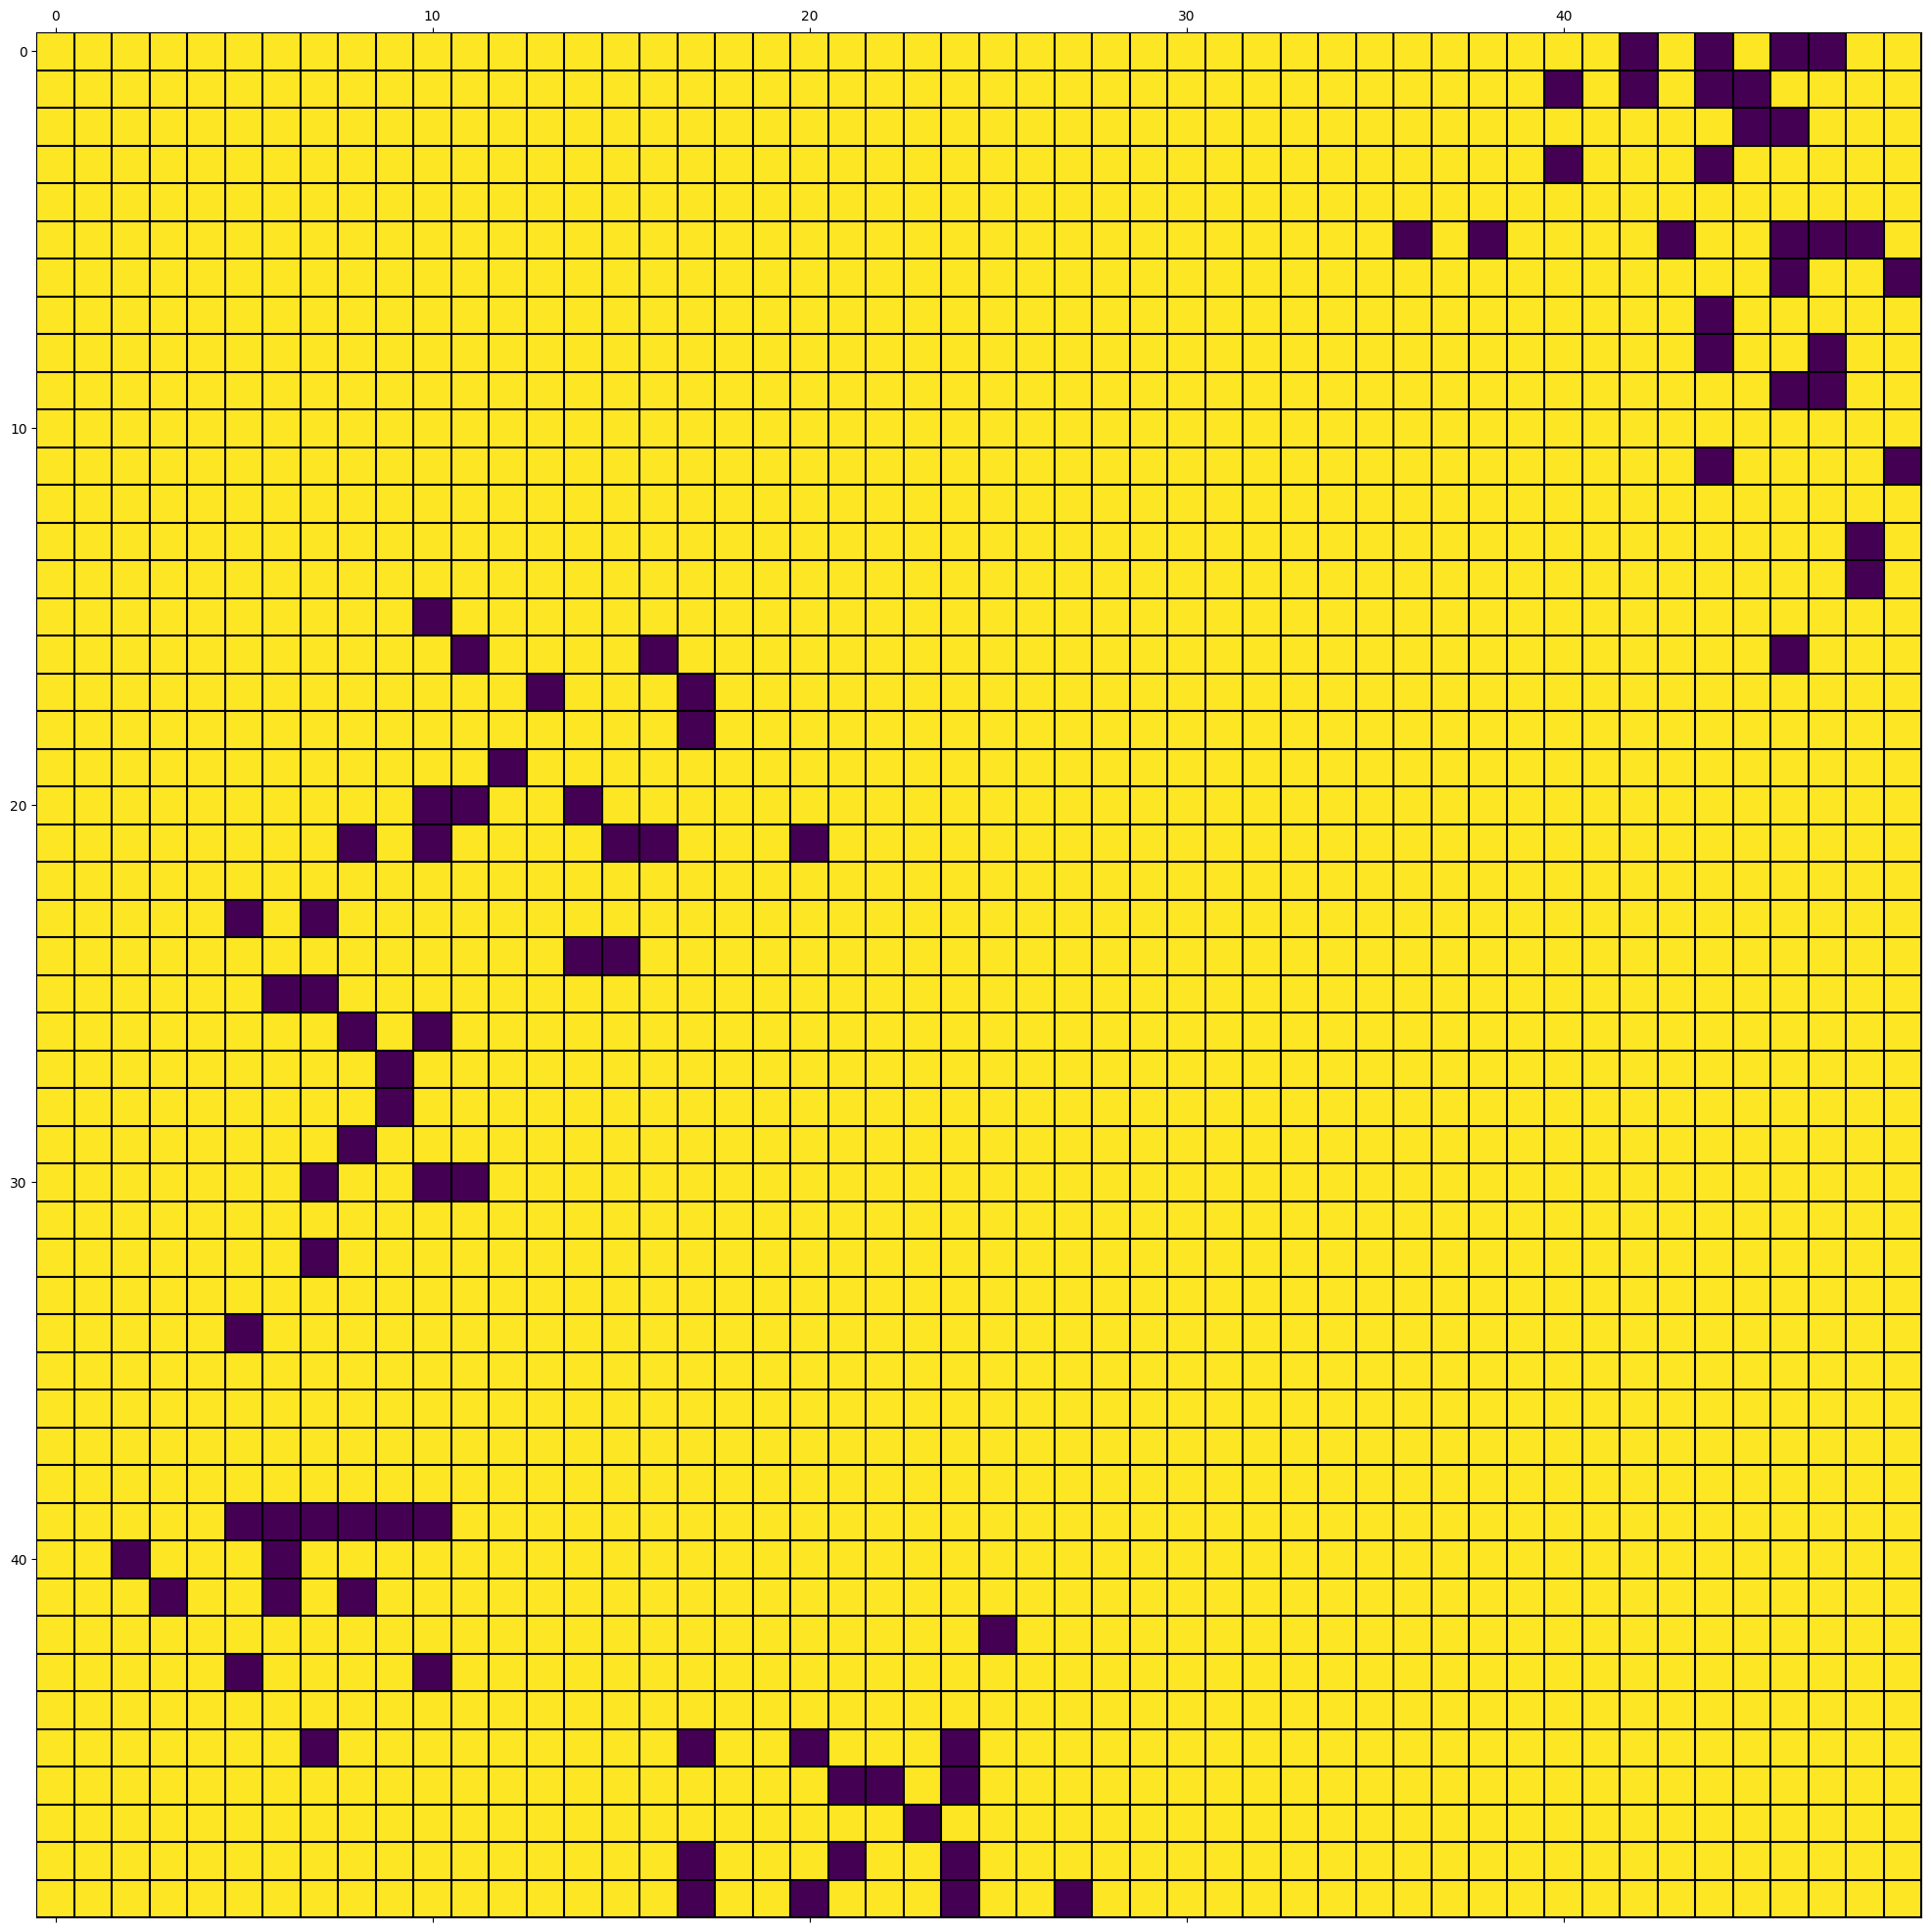

In [53]:
map.visualize_mat(MapLayerType.UNIT, include_zones=False)